<a href="https://colab.research.google.com/github/TheThirdKnife/Student/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85%20(StudentPerformanceFactors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем библиотеки
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Загружаем набор данных
StudentPerformanceFactors_df = pd.read_csv('/content/drive/MyDrive/StudentPerformanceFactors.csv')
StudentPerformanceFactors_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [2]:
StudentPerformanceFactors_nu = StudentPerformanceFactors_df
# Преобразуем категориальные переменные в факторы
StudentPerformanceFactors_nu['Parental_Involvement'] = pd.factorize(StudentPerformanceFactors_nu['Parental_Involvement'])[0]
StudentPerformanceFactors_nu['Access_to_Resources'] = pd.factorize(StudentPerformanceFactors_nu['Access_to_Resources'])[0]
StudentPerformanceFactors_nu['Extracurricular_Activities'] = pd.factorize(StudentPerformanceFactors_nu['Extracurricular_Activities'])[0]
StudentPerformanceFactors_nu['Motivation_Level'] = pd.factorize(StudentPerformanceFactors_nu['Motivation_Level'])[0]
StudentPerformanceFactors_nu['Internet_Access'] = pd.factorize(StudentPerformanceFactors_nu['Internet_Access'])[0]
StudentPerformanceFactors_nu['Family_Income'] = pd.factorize(StudentPerformanceFactors_nu['Family_Income'])[0]
StudentPerformanceFactors_nu['Teacher_Quality'] = pd.factorize(StudentPerformanceFactors_nu['Teacher_Quality'])[0]
StudentPerformanceFactors_nu['School_Type'] = pd.factorize(StudentPerformanceFactors_nu['School_Type'])[0]
StudentPerformanceFactors_nu['Peer_Influence'] = pd.factorize(StudentPerformanceFactors_nu['Peer_Influence'])[0]
StudentPerformanceFactors_nu['Learning_Disabilities'] = pd.factorize(StudentPerformanceFactors_nu['Learning_Disabilities'])[0]
StudentPerformanceFactors_nu['Parental_Education_Level'] = pd.factorize(StudentPerformanceFactors_nu['Parental_Education_Level'])[0]
StudentPerformanceFactors_nu['Distance_from_Home'] = pd.factorize(StudentPerformanceFactors_nu['Distance_from_Home'])[0]
StudentPerformanceFactors_nu['Gender'] = pd.factorize(StudentPerformanceFactors_nu['Gender'])[0]
# Создадим дубликат преобразованного набора
StudentPerformanceFactors_nul = StudentPerformanceFactors_nu
StudentPerformanceFactors_nu.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,0,0,7,73,0,0,0,0,0,0,0,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,0,2,1,0,0,1,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,0,2,1,0,0,2,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,0,1,1,0,0,1,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,0,3,1,1,0,2,4,0,1,0,1,70


In [10]:
# Описываем модель
model = KMeans(n_clusters=4)

# Проводим моделирование
model.fit(StudentPerformanceFactors_nu)

# Добавляем в исходный набор новый столбец с номером кластера наблюдения
StudentPerformanceFactors_nu['cluster'] = model.fit_predict(StudentPerformanceFactors_nu)
StudentPerformanceFactors_nu.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,cluster
0,23,84,0,0,0,7,73,0,0,0,...,0,0,0,3,0,0,0,0,67,1
1,19,64,0,1,0,8,59,0,0,2,...,0,0,1,4,0,1,1,1,61,3
2,24,98,1,1,1,7,91,1,0,2,...,0,0,2,4,0,2,0,0,74,0
3,29,89,0,1,1,8,98,1,0,1,...,0,0,1,4,0,0,1,0,71,0
4,19,92,1,1,1,6,65,1,0,3,...,1,0,2,4,0,1,0,1,70,1


Text(0, 0.5, 'Exam_Score')

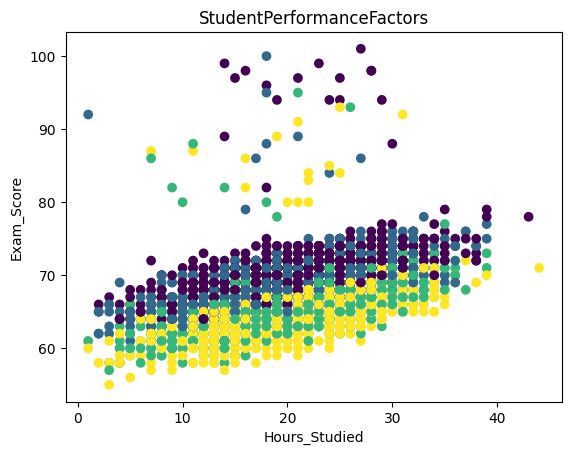

In [11]:
#Строим график
plt.scatter(StudentPerformanceFactors_nu['Hours_Studied'], StudentPerformanceFactors_nu['Exam_Score'], c = StudentPerformanceFactors_nu['cluster'])
plt.title('StudentPerformanceFactors')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')

Text(0, 0.5, 'WCSS')

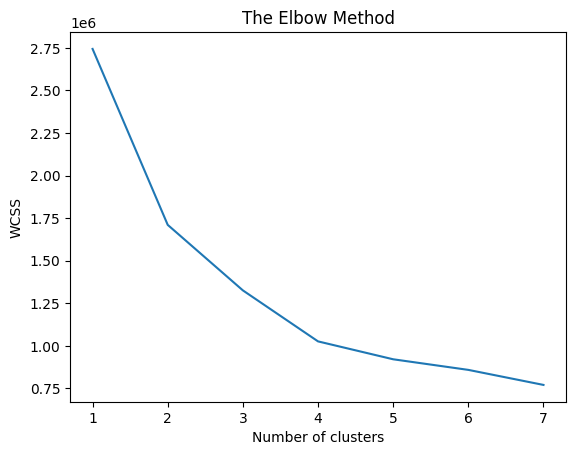

In [9]:
#Инициализируем переменную, в которую будем записывать kmeans.inertia_
wcss = []
# В цикле проведем кластерный анализ для различного числа кластеров,
# присоединяя к массиву vcss соответствующие значения внутрикластерной суммы квадратов
for i in range(1, 8):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=69)
  kmeans.fit(StudentPerformanceFactors_nul)
  wcss.append(kmeans.inertia_)
# Построим график
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

<Axes: xlabel='cluster', ylabel='Exam_Score'>

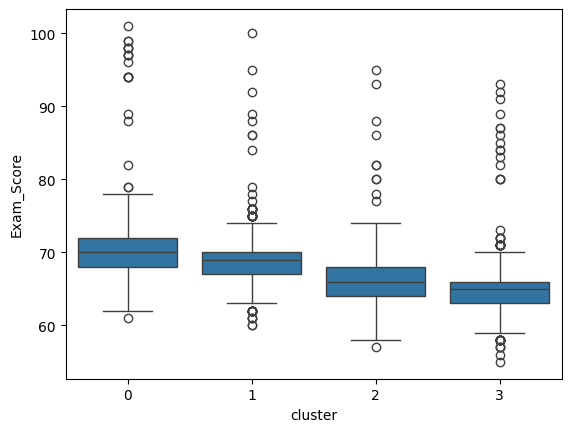

In [12]:
# Построим график "ящик с усами"

sns.boxplot(x="cluster", y="Exam_Score", data=StudentPerformanceFactors_nu)

In [13]:
# Составим по данным о наличии внеклассных занятий и кластера сводную таблицу
StudentPerformanceFactors_df['cluster'] = StudentPerformanceFactors_nu['cluster']
StudentPerformanceFactors_df.groupby(['cluster', 'Extracurricular_Activities'])['cluster'].count().unstack()

Extracurricular_Activities,0,1
cluster,,
0,659,935
1,687,964
2,647,1021
3,676,1018


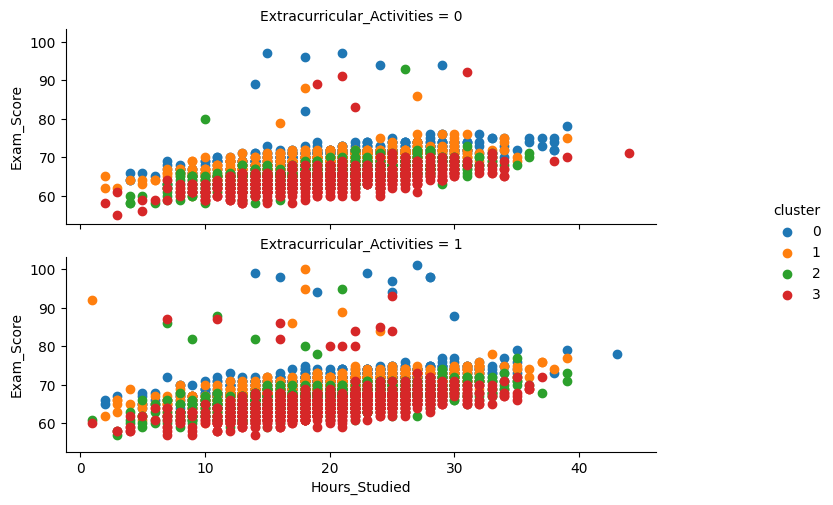

In [14]:
# Построим визуализацию разброса экхаменационных баллов в зависимости от часов обучения отдельно для тех, кто занимался внеклассными занятиями и кто не занимался Extracurricular_Activities = 0
g = sns.FacetGrid(StudentPerformanceFactors_df, row="Extracurricular_Activities", hue='cluster')
g = g.map(plt.scatter, "Hours_Studied", "Exam_Score").add_legend()
# Зададим размер отображения графиков
g.fig.set_size_inches(10,5)